# *Spacecraft 2025*
## Tracking the rotation of sunspots 

## This notebook contains all the required code for tracking sunspots

## Following is the procedure

#### 1) Load Suryapy and other libraries
#### 2) Loading images onto python
#### 3) Finding the radius of the sun"
#### 4) Finding the location of the sunspots
#### 5) Using our formula to find the time period of the spots rotation
#### 6)  $\rho^2$=(1-$\zeta$)$\sin^2(\frac{2\pi(t-t_0)}{T}$)+$\zeta^2$ 

## Installing suryapy

In [1]:
#import required packages

from astrolab import imaging as im
from astrolab import photometry as phot
import numpy as np
import matplotlib.pyplot as plt
from astrolab import spectroscopy as spec
from scipy.optimize import curve_fit 

from suryapy import b_roth, mask_sun, display, find_spot, process



In [134]:
import os
os.chdir("/Users/soumit/Downloads/suryapy")
# !pip install .
plt.rcParams['figure.dpi']=100    #this just affects the quality of the images, need not be changed


## Load the desired images using the 'im.load_image' function from astrolab

#### It is essential that we load the images (JPG,JPEG,PNG) onto our python notebook to begin with analysis. Once we load these images under any name , for example 'image_1'. We can call upon image_1 for any further analysis we would need

In [163]:
# format: image= im.load_image('file directory')

example_image= im.load_image("/Users/soumit/Downloads/Astronomy/Sun Spots/22.JPG")



## Display any loaded image using 

#### Using the display function we can display any image that we have loaded onto the notebook, just use the name you have assigned to the notebook
Format: display(image_name)

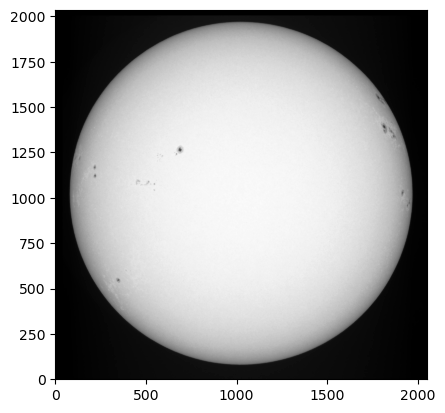

In [4]:
#format: display(image name)


## Find the suns edge using 'mask_sun' function 
This function seperates the sun from the background by creating a 'mask'. This helps us find the edge of the sun which in return helps us find the radius and diameter. It converts the original image to black and white (0s and 1s). The bright part that is the sun becomes 1, and the background becomes 0

In [164]:
#format: mask_sun(example_image, print_log='True')


In [165]:
## Here we can add the center of the sun under r_sun. This will be needed later
r_sun= 1891/2  #make sure you divide the diameter by two!

print(r_sun)

945.5


## Add the (loaded) images you wish to analyze under image_list
Here we select all the images we wish to analyse from the loaded images. Fill this part with your image names


In [166]:
image_list = []  #example: image_list = [image1, image2, image3,......]
#P.s - Order matters, you wouldn't want a sun rotating both ways!!

## Add the rough locations of the spot

#### At this point I would reccomend you add the images and spot locations one by one. Since the spots move along one line ther should not be a big change in your y axis values. Furthermore, this makes it easier to see if you are able to locate the spot properly

In [8]:
#[x values, y values]

rough_spot = [ ]

#### At this point I would reccomend you go through the images to choosed the desired spot. You can use the display function to note down rough locations and proceed from there


## Here we display all the images ! the red circle shows the spot you have highlighted

### Here, the loop crops all the images to the edge of the sun and saves it under the list crop_list. And the spot locations as spot_list. Now

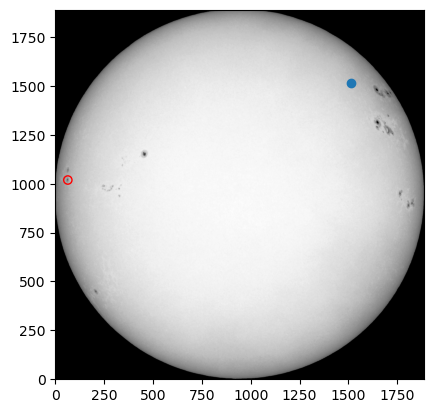

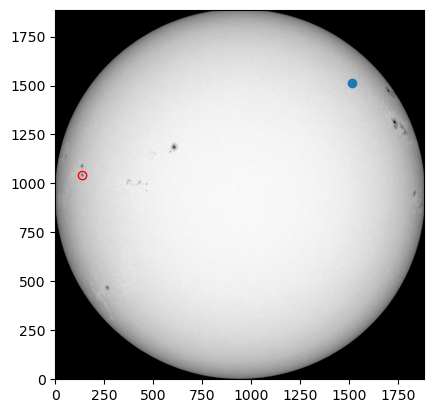

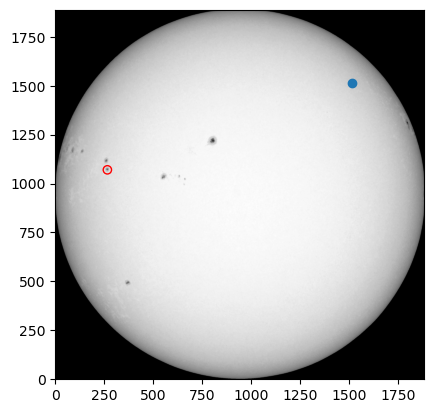

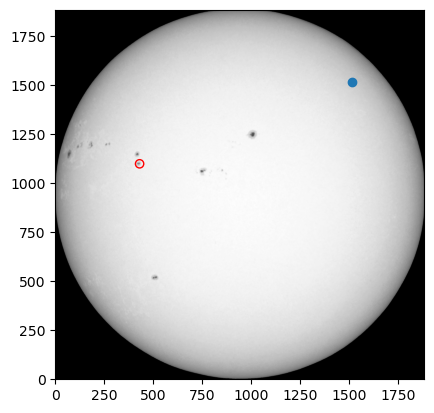

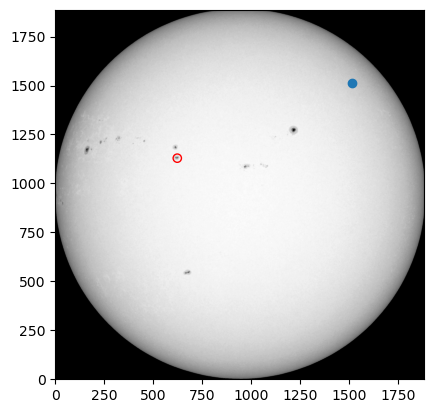

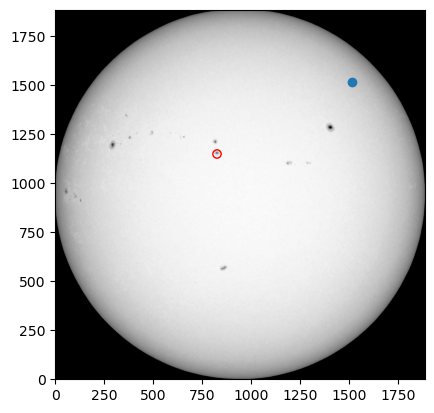

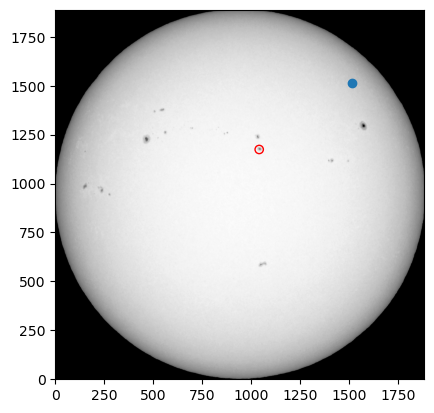

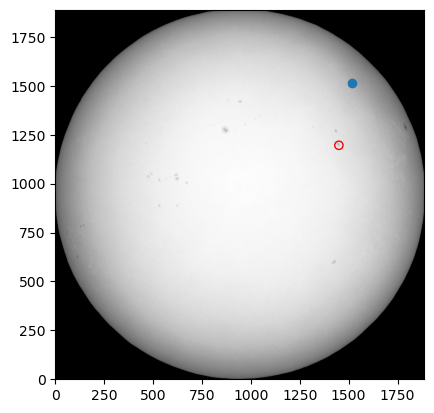

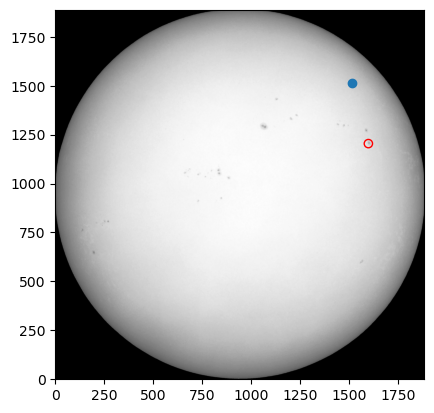

In [9]:
crop_list = []  
spot_list = []
for i in range(len(image_list)):
    this_crop, this_spot = process(image_list[i], spot_pos = rough_spot[i], print_log=True)   #print_log= True to see the images
    crop_list.append(this_crop)
    spot_list.append(this_spot)

spot_list = np.array(spot_list)


# If the Red circle is not on the spot, try changing the x and y values you have given

In [10]:
#printing spot list gives us the exact location of the spots on the surface of the sun
print(spot_list)  

[[  64 1019]
 [ 139 1040]
 [ 266 1070]
 [ 430 1099]
 [ 623 1129]
 [ 825 1149]
 [1042 1174]
 [1450 1196]
 [1600 1204]]


## Here we begin by using the formulas we earlier mentioned. 

### $\rho^2$ = (1-$\zeta$)$\sin^2(\frac{2\pi(t-t_0)}{T}$)+$\zeta^2$

## Since we need to plot a graph of $\rho^2$ vs t we begin by adding those values. t here is simply the time stamp between two images since $\rho$ is the projection of the spot 
### $\rho^2$= $\frac{x^2+y^2}{r_{sun}^2}$

#### Fill in the time differences in t_sidc

In [11]:
t_sidc=np.array([])  #time between consectuive images for SIDC images


x1= spot_list[:,0]-r_sun #position on x axis. [:,0] takes all x values from rough_spot
y1 =spot_list[:,1]-r_sun #position on y axis. [:,1] takes all y values from rough_spot


rhosq_sidc= (x1**2+y1**2)/r_sun**2 #rho square
rho_sidc= np.sqrt(rhosq_sidc)

## Now that we have our values for $\rho^2$ and t lets plot our graph and see what we get

Text(0, 0.5, 'ρ^2')

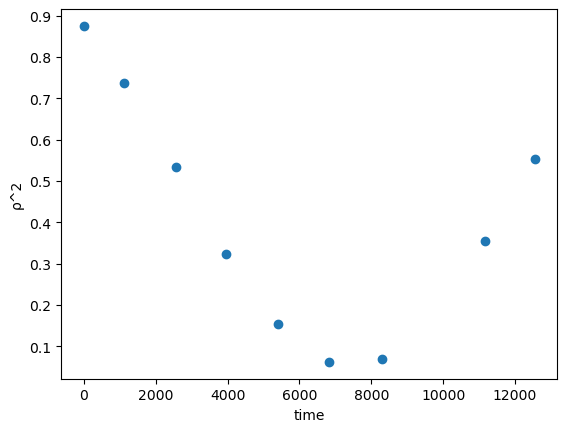

In [12]:
plt.scatter(t_sidc,rhosq_sidc)
plt.xlabel('time')
plt.ylabel('ρ^2')

### With the graph our aim is to try and understand where the minima of the scatter plot lies, as that value on the x or times axis will give us the rotational period of the spot

To make it easier to determine, we can use what we a call a non linear curve fit which tries to fit a function to our data points which makes it easier for us to spot the minima 

In [13]:

def sin_fit_sidc(t_sidc, zeta, t0, T):

    
    zetasq=zeta**2
    
    eq= np.sin((2*np.pi*(t_sidc-t0))/T)**2  

    rhosq_eq =  (1-zetasq)* eq +zetasq
    return rhosq_eq

## Here using the scipy optimize function we can plot the non linear curve fit, just run the cell. 

[  0.          18.5         42.56666667  65.7         89.9
 113.76666667 138.33333333 186.3        209.21666667]
zeta = 0.2303 $Rsun$
t_0 = 5.2 days
Time period T = 27.2 days


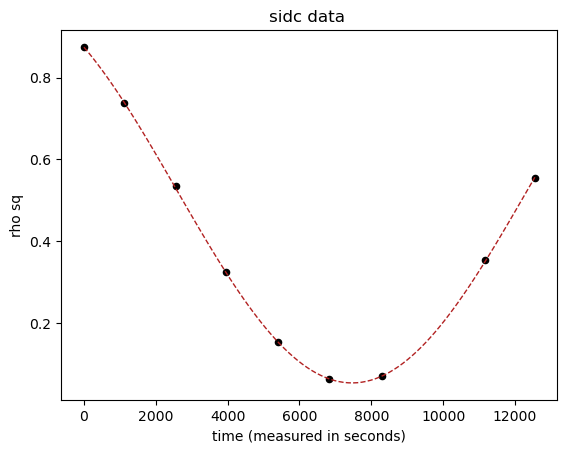

In [14]:
#plot of curve fit for sidc data
#WARNING! Make sure that you select the same spot on the SIDC images as you do in your data to ensure you calculate the correct zeta, t0 and T values as they can change from spot to spot

data_x_sidc = t_sidc
data_y_sidc = rhosq_sidc

sidc_data_x = np.linspace(np.min(t_sidc), np.max(t_sidc), 100)
spot_params_sidc, spot_covar_sidc = curve_fit(sin_fit_sidc, data_x_sidc, data_y_sidc, p0= [0.5,6000,27*1440 ])

plt.scatter(data_x_sidc, data_y_sidc, color='k', s=20)
plt.plot(sidc_data_x, sin_fit_sidc(sidc_data_x, spot_params_sidc[0], spot_params_sidc[1], spot_params_sidc[2]), color='firebrick', ls='--', lw=1)

plt.xlabel('time (measured in seconds)')
plt.ylabel('rho sq')
print(t_sidc/60)
plt.title('sidc data ')

print(f"zeta = {spot_params_sidc[0]:.4f} $Rsun$")
print(f't_0 = {spot_params_sidc[1]/(24*60):.1f} days')
print(f"Time period T = {spot_params_sidc[2]/(24*60):.1f} days")

#spot_params_sidc[0]= zeta
#spot_params_sidc[1]= t0
#spot_params_sidc[2]= T

# **Calculating the Angular Diameter of the Sun**

### Now that you know how to load images, lets try to load the images we took in the lab earlier. You can use the im.load_image function from astrolab. Make sure the image names are not the same!

In [15]:
#example_image2= im.load_image('path directory')
# Load your images!



## Bradley-Roth Thresholding

### Here we try to use the concept of Bradley Roth thresholding to make our images and spots look clearer. Using the b_roth we can conduct thresholding of the image. Following is a small explanation of what thresholding does

Bradley Roth thresholding is an adaptive image thresholding technique that determines whether each pixel in a grayscale image should be considered foreground or background based on the local neighborhood around it. Instead of using a global threshold value, it computes the average intensity in a local window around each pixel and compares the pixel's value to a percentage (the "threshold") of that average. If the pixel's intensity is significantly lower than the local average, it's marked as foreground (often black); otherwise, it's background (often white). This method is especially effective for images with uneven lighting or varying background conditions.


This adaptive thresholding method calculates the mean intensity \( \mu \) in a local window around each pixel. A pixel at position \( (x, y) \) is set to foreground if its intensity \( I(x, y) \) satisfies:

\[
I(x, y) < (1 - t) \cdot \mu
\]

Where:
- \( \mu \) is the mean intensity of the surrounding window
- \( t \) is the threshold value (typically a small constant like 0.15)


In [161]:
#Try using Bradley Roth on one of your earlier images
#format: b_roth(crop_list[0], threshold value, number of squares)

b_roth_trial = (crop_list[0], 8, 100)



### From here we can now locate the spots again and note down their postions. To make it easier we can follow the following procedure:

1) Display the bradley images one by one using the 'display' function
2) Next use the 'find_spot' function. Use the given format below for each of your images to find the location of the spot by entering a rough location at spot_pos
3) Note down the x and y axis values which we can later use to calculate the angular diameter
4) Plot a graph of the distance vector from the origin ($x^2+y^2$) vs time interval

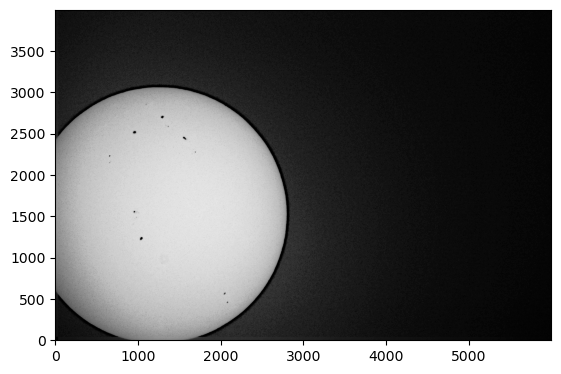

In [162]:
#multiply the bradley roth thresholded image with the respective original image

display(b_roth_2*img_2)

1364.880947189168


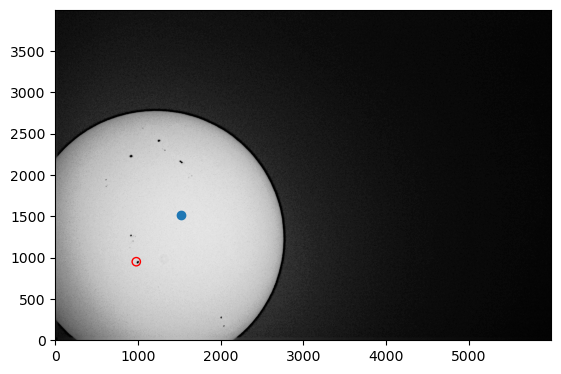

In [118]:
# array_spot.append([]) #y axis co ordinate
#format: find_spot(array= img_name , spot_pos=[x_val, y_val], print_log=True)
find_spot(array= b_roth_1*img_1, spot_pos=[1000,1000], print_log=True)

radial_distance = np.sqrt(980**2 + 950**2)  # sqrt( x^2 +y^2)
print(radial_distance)


## Here add down the time and radial distance data

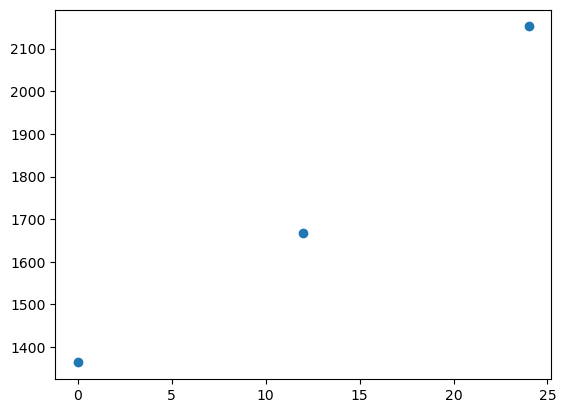

In [128]:
time = np.array([])
radial= np.array([])

plt.scatter(time, radial)

### Plotting a best fit line
$y = mx+c$

32.83333333333335


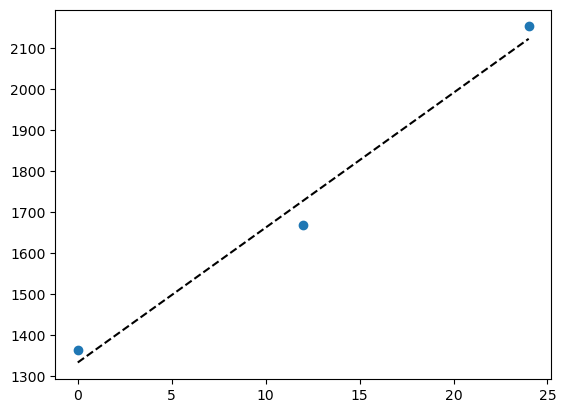

In [132]:
results = np.polyfit( time ,rad, 1)
m= results[0]
c= results[1]
y_model = m*time + c

plt.scatter(time, rad)
plt.plot(time , y_model,'--', color= 'black')

print(m)

## Calulating Earths rotational period

In [157]:
deg = (((360)/(24*60*60*m)))
print(deg, 'Degree/sec') 

0.0001893939393939394 Degree/sec


In [158]:
# Given values
time_interval = 12  # seconds between each photo
conversion_factor = deg*3600 # converting from degree/sec to arcseconds per pixel per second

# Step 1: Calculate angular velocity in arcseconds per second
angular_velocity = m * conversion_factor  # arcseconds per second

# Step 2: Calculate angular displacement over the time interval (12 seconds)
angular_displacement = angular_velocity * time_interval  # arcseconds
print(f"Angular velocity: {angular_velocity} arcseconds per second")
print(f"Angular displacement over {time_interval} seconds: {angular_displacement} arcseconds")

# Step 3: Convert angular displacement to pixels
# We know that 1 pixel corresponds to 0.46875 arcseconds
arcseconds_per_pixel = conversion_factor
pixels = angular_displacement / arcseconds_per_pixel  # pixels

print(f"Angular displacement of {angular_displacement} arcseconds corresponds to {pixels} pixels.")

# Step 4: If the Sun moves over a longer period (e.g., 60 seconds), calculate the total angular displacement
total_time = 128 # total time (e.g., Sun moving across the frame for 60 seconds)
total_angular_displacement = angular_velocity * total_time  # arcseconds
total_pixels = total_angular_displacement / arcseconds_per_pixel  # pixels

print(f"Total angular displacement over {total_time} seconds: {total_angular_displacement} arcseconds")
print(f"Total angular displacement of {total_angular_displacement} arcseconds corresponds to {total_pixels} pixels.")


Angular velocity: 14.999999999999998 arcseconds per second
Angular displacement over 12 seconds: 179.99999999999997 arcseconds
Angular displacement of 179.99999999999997 arcseconds corresponds to 264.0 pixels.
Total angular displacement over 128 seconds: 1919.9999999999998 arcseconds
Total angular displacement of 1919.9999999999998 arcseconds corresponds to 2816.0 pixels.


rotation speed of earth= 15 arcseconds/sec
​
